# Bar data

In [1]:
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=14)

<IB connected to 127.0.0.1:7497 clientId=14>

## Historical data

To get the earliest date of available bar data the "head timestamp" can be requested:

In [2]:
contract = Stock('TSLA', 'SMART', 'USD')

ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

datetime.datetime(2010, 6, 29, 8, 0)

To request hourly data of the last 60 trading days:

In [3]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='60 D',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1)

In [4]:
bars[0]

BarData(date=datetime.datetime(2017, 7, 5, 15, 30), open=347.2, high=347.24, low=337.06, close=337.89, volume=29088, barCount=16418, average=341.133)

Convert the list of bars to a data frame and print the first and last rows:

In [5]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,barCount,average
0,2017-07-05 15:30:00,347.20,347.24,337.06,337.89,29088,16418,341.133
1,2017-07-05 16:00:00,337.70,339.23,332.71,336.46,32068,17481,335.859
2,2017-07-05 17:00:00,336.50,336.51,331.00,333.60,19357,11072,333.151
3,2017-07-05 18:00:00,333.56,336.63,333.56,335.85,10023,5747,335.196
4,2017-07-05 19:00:00,335.91,338.56,335.17,336.74,9181,5434,337.121


,date,open,high,low,close,volume,barCount,average
415,2017-09-27 17:00:00,344.23,345.38,342.40,343.15,4252,2318,343.737
416,2017-09-27 18:00:00,343.16,344.29,341.88,343.71,4274,2056,343.089
417,2017-09-27 19:00:00,343.68,346.95,342.98,345.79,4026,2132,345.213
418,2017-09-27 20:00:00,345.70,346.10,343.10,343.30,4188,2186,344.490
419,2017-09-27 21:00:00,343.31,344.63,340.50,340.99,11952,6721,342.191


Instruct the notebook to draw plot graphics inline:

In [6]:
%matplotlib inline

Plot the close data

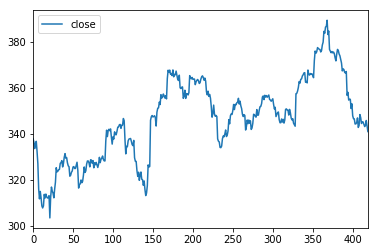

In [7]:
df.plot(y='close');

There is also a utility function to plot bars as a candlestick plot. It can accept either a DataFrame or a list of bars. Here it will print the last 100 bars:

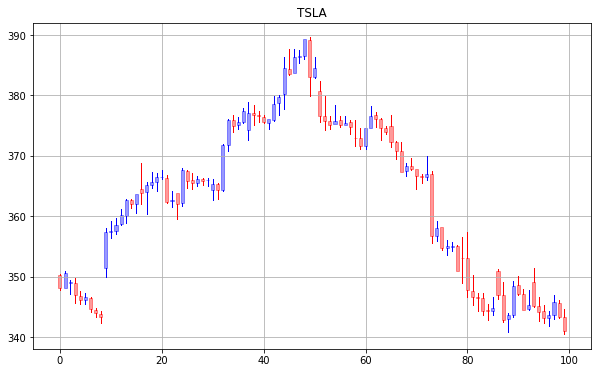

In [8]:
util.barplot(bars[-100:], title=contract.symbol);

## Historical data with realtime updates

A new feature of the API is to get live updates for historical bars. This is done by setting `endDateTime` to an empty string and the `keepUpToDate` parameter to `True`.

Let's get some bars with an keepUpToDate subscription:

In [9]:
contract = Forex('EURUSD')

bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='900 S',
        barSizeSetting='10 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=1,
        keepUpToDate=True)

Replot for every change of the last bar:

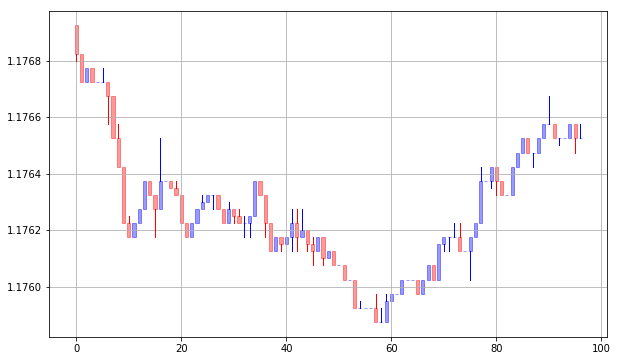

In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = util.barplot(bars)
    clear_output(wait=True)
    display(plot)

ib.setCallback('barUpdate', onBarUpdate)
ib.sleep(60)
ib.cancelHistoricalData(bars)